In [1]:
#importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xlrd
import pandas as pd
import datetime
import pickle
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/clvp-dataset/online_retail_II.xlsx


In [2]:
#reading the excel file
df = pd.read_excel("/kaggle/input/clvp-dataset/online_retail_II.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"]) 

In [3]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [4]:
#checking for the shape of data
df1.shape, df2.shape 

((525461, 8), (541910, 8))

In [5]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [6]:
#combing the data
data = pd.concat([df1, df2], ignore_index=True)

In [7]:
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
data.shape

(1067371, 8)

In [9]:
#checking for the null values
data.isnull().sum()/data.shape[0]*100 

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [10]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [11]:
#Checking the data before droping these customer ID's
data.isnull().sum() 

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [12]:
data[data["Customer ID"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [13]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [14]:
#Check if there is null values available in the data
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [15]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [16]:
#creating the temporary data frame
temp_df = pd.DataFrame(data["Country"].value_counts()) 
temp_df.head(10)

,count
Country,
United Kingdom,741301
Germany,17624
EIRE,16195
France,14202
Netherlands,5140
Spain,3811
Belgium,3123
Switzerland,3064
Portugal,2504


In [17]:
names  = temp_df.index

In [18]:
px.scatter(temp_df, y = "count", color = names) #checking for the occurence of most countries in our data

As you can see the United Kingdom has the max transcations as compared to other countries. The one here to note is that the "United Kingdom" is the dominating class in this data which making our data looks kinda imbalanced between major class and the minority class.

You can cross check the same after de-selecting the United Kingdom from the above chart and see how your axis transforms.

In [19]:
# Ensure column names are lowercase and consistent
data.columns = data.columns.str.strip().str.lower()

# Group by country and sum only the 'quantity' column
top_countries_by_quantity = data.groupby("country")["quantity"].sum().sort_values(ascending=False).head(10)

# Print result
print(top_countries_by_quantity)

country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: quantity, dtype: int64


In [20]:
import plotly.express as px

#checking for the average price by country

px.scatter(data.iloc[:, [5, 7]].groupby(["country"]).mean(),y = "price", size = "price", title = "Average Price by Country", opacity = 0.48)

From the above dot plot we can conclude that the Singapore has the highest averge price followed by the Norway and Malta. Let's go deeper and see the distribution to better understand about our data.

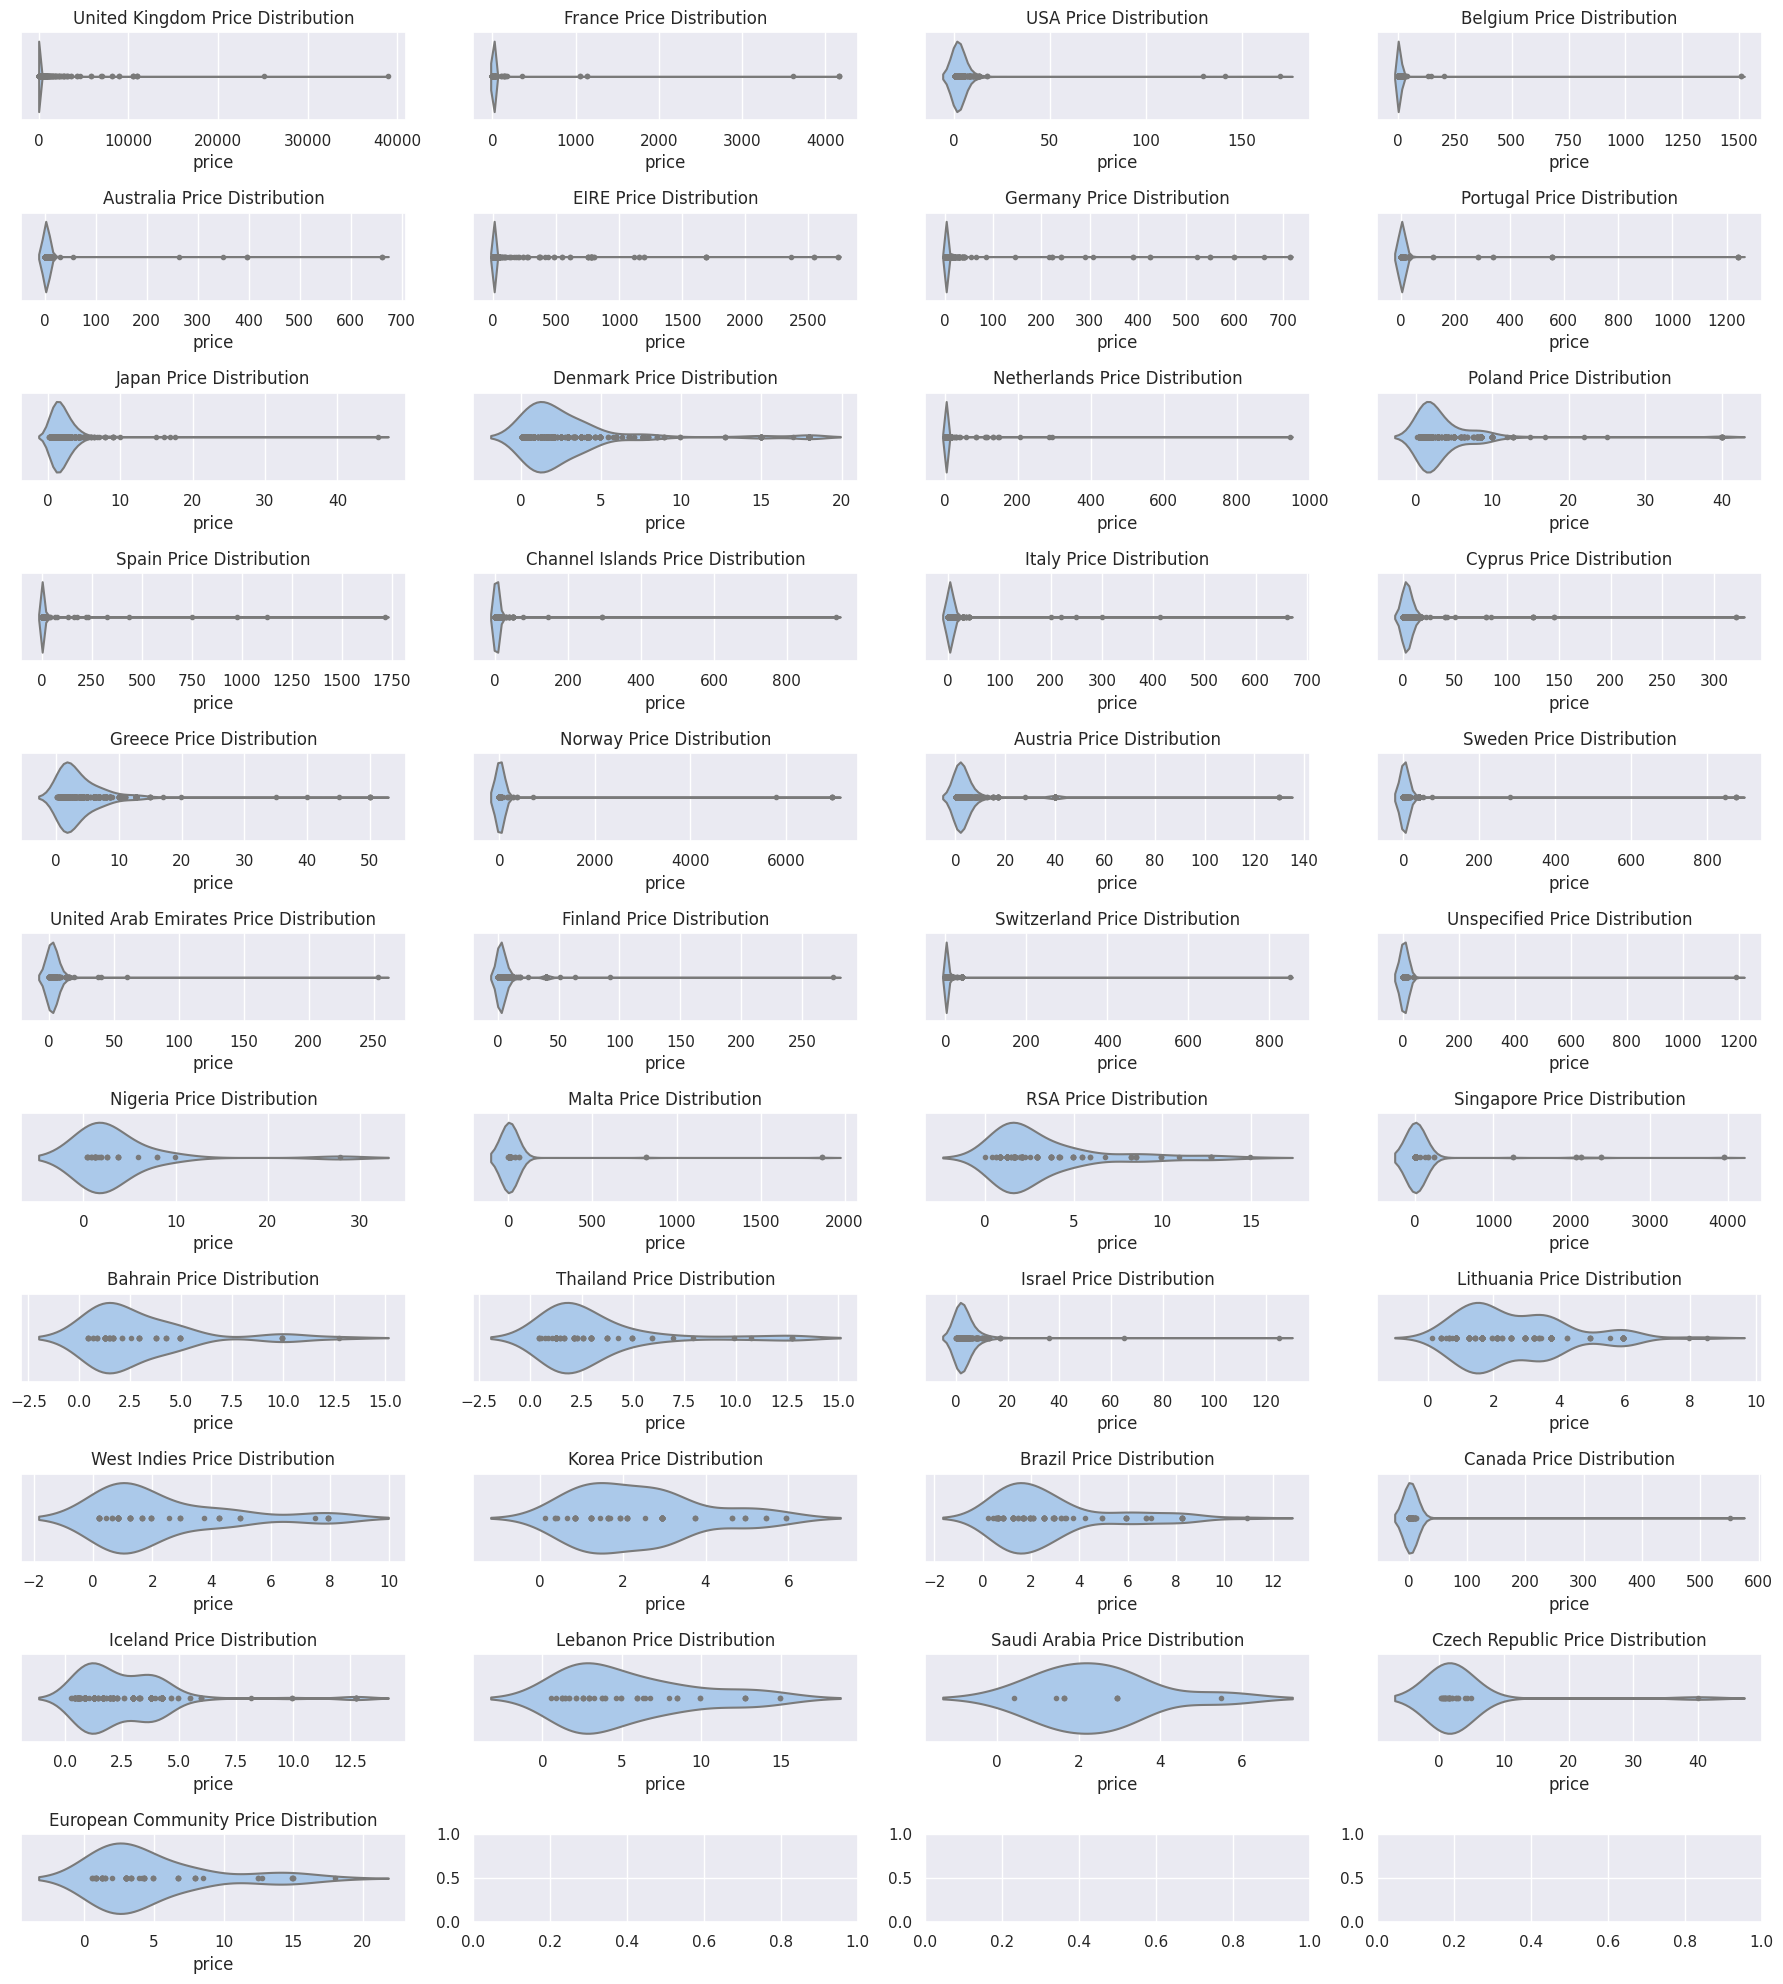

In [21]:
#extracting unique country names
countries = data["country"].unique() 

#plotting the violin plot for the data
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "price", data = data[data["country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [22]:
# Total number of unique invoices
print("Unique invoices:", len(data["invoice"].unique()))

Unique invoices: 44876


In [23]:
# Select only numeric columns before summing
numeric_cols = data.select_dtypes(include='number').columns

# Group by invoice and sum only numeric columns
temp_invoice_df = data.groupby("invoice")[numeric_cols].sum().reset_index()

# Top 30 invoices by quantity
top_30 = temp_invoice_df.sort_values(by="quantity", ascending=False).head(30)

# Visualize top 30 invoices by quantity
top_30.iloc[:, :2].style.background_gradient(cmap="Blues")

,invoice,quantity
11080,518505,87167
13425,524174,87167
3064,497946,83774
36942,581483,80995
20348,541431,74215
4379,501534,63974
2096,495194,63302
4693,502269,40000
1604,493819,25018
1047,491812,20524


In [24]:
# Standardize column names
data.columns = data.columns.str.lower()

# Remove only cancelled invoices (starting with 'C') 
data = data[~data['invoice'].astype(str).str.startswith('C')]

# Calculate unit total_price if needed 
data['total_price'] = data['quantity'] * data['price']

# calculate average unit price manually per invoice
# Sum of total price / total quantity
invoice_price_avg = data.groupby('invoice').apply(
    lambda x: (x['total_price'].sum() / x['quantity'].sum())
)

# Convert to DataFrame
invoice_price_avg = invoice_price_avg.to_frame(name='Price')

# Get top 15 invoices by avg. price
top_15 = invoice_price_avg.sort_values('Price', ascending=False).head(15)
print(top_15)

            Price
invoice          
502263   10953.50
524159   10468.80
496115    8985.60
551697    8142.75
501768    6958.17
501766    6958.17
573077    4161.06
573080    4161.06
517483    3610.50
569382    3155.95
571751    3034.03
524162    2769.90
529356    2736.16
527258    2667.88
525498    2545.85


Grouped the data by Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number 512771 and 537632 has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.

In [25]:
data[(data["invoice"] == 512771) | (data["invoice"] ==  537632)]

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country,total_price


As you can see above, These 2 invoices with invoice number 502263 and 524159 had only single transaction, that's why the average price was too high.

# INITIAL EDA INSIGHTS:
Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.

If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale followed by the Norway and Malta.

Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

There are total 44876 uniques purchased happend so far.

We have also observed some of the Invoices who have purchased most of the quantities within 2 year of span.

When it comes to the average spend there are 2 invoices with number 512771 and 537632 having the highest average spent but upon inspection we also found the average product purchase was only 1 which are from United kingdom.

In [26]:
#data tosee what else insights we can get from the data itself
data.head(15)

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.50
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.00


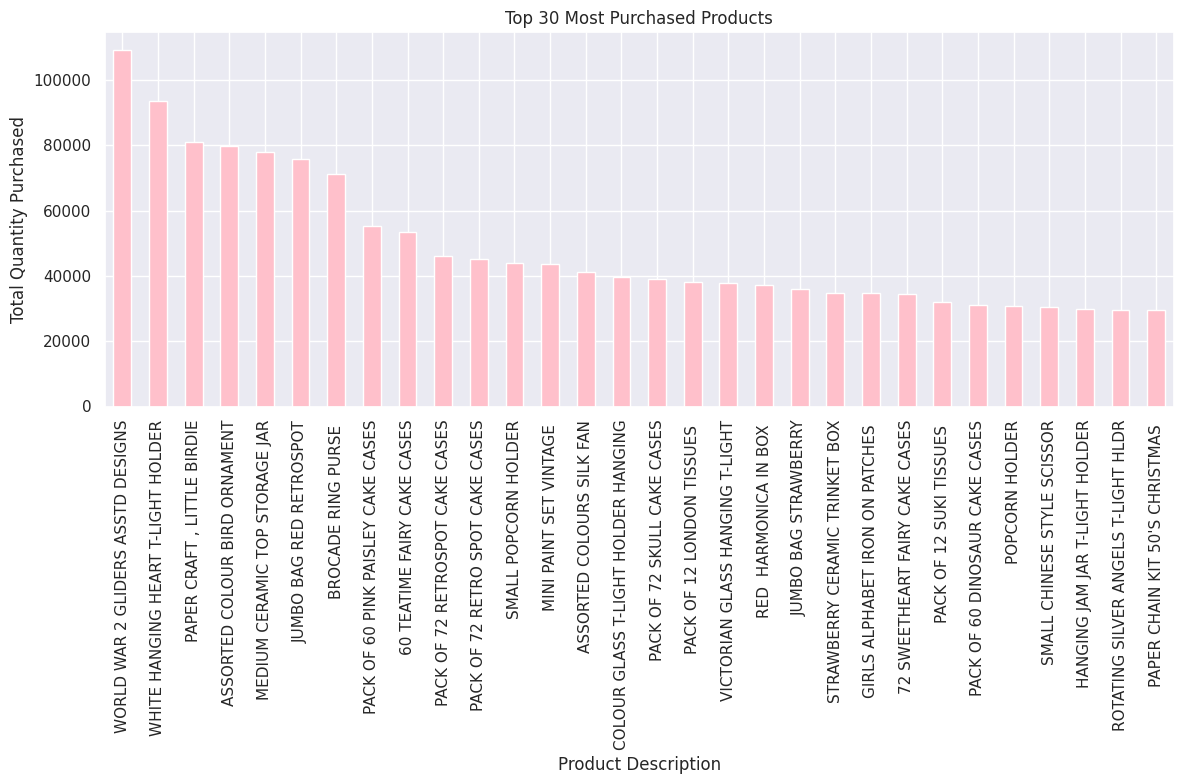

In [27]:
import matplotlib.pyplot as plt

# Group by description and sum only numeric columns (e.g., quantity)
product_quantity = data.groupby("description")[["quantity"]].sum()

# Sort and get top 30 products
top_30_products = product_quantity.sort_values(by="quantity", ascending=False).head(30)

# Plot
plt.figure(figsize=(12, 8))
top_30_products["quantity"].plot(kind="bar", color='pink')
plt.title("Top 30 Most Purchased Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Purchased")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Top 8 Countries With Popular Products**

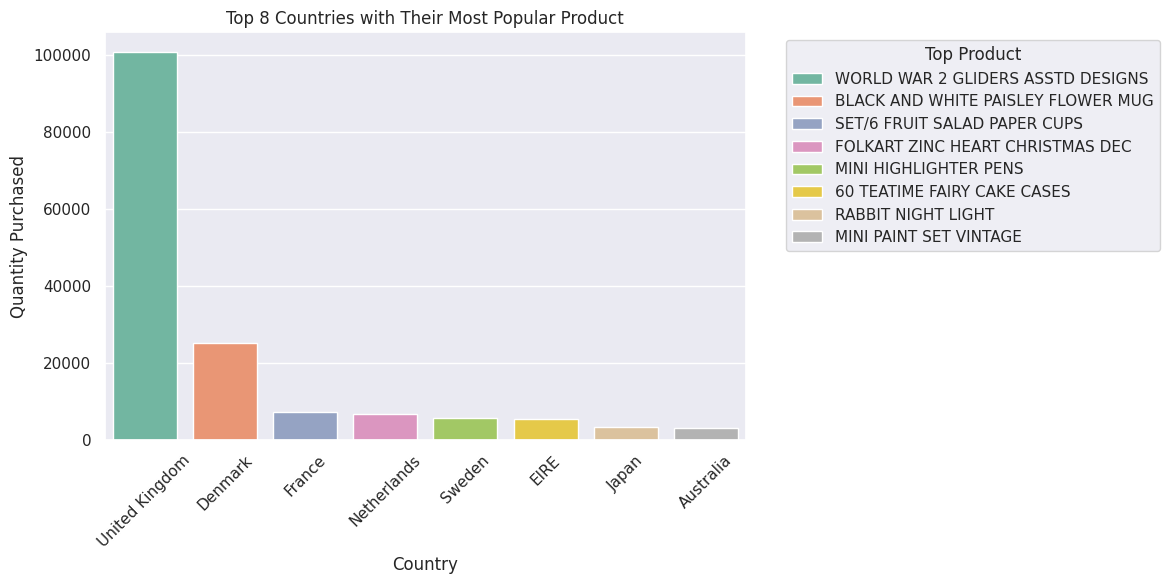

In [28]:
# Group by country and description, and sum quantity
country_product_quantity = data.groupby(['country', 'description'])['quantity'].sum().reset_index()

# For each country, get the most purchased product (i.e. highest quantity)
top_products_by_country = country_product_quantity.sort_values('quantity', ascending=False).drop_duplicates('country')

# Get top 8 countries based on total quantity sold (can also use .nlargest)
top_8 = top_products_by_country.sort_values(by='quantity', ascending=False).head(8)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_8, x='country', y='quantity', hue='description', dodge=False, palette='Set2')

plt.title("Top 8 Countries with Their Most Popular Product")
plt.ylabel("Quantity Purchased")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Top Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Bottom 8 Countries with Mostly Purchased Products**

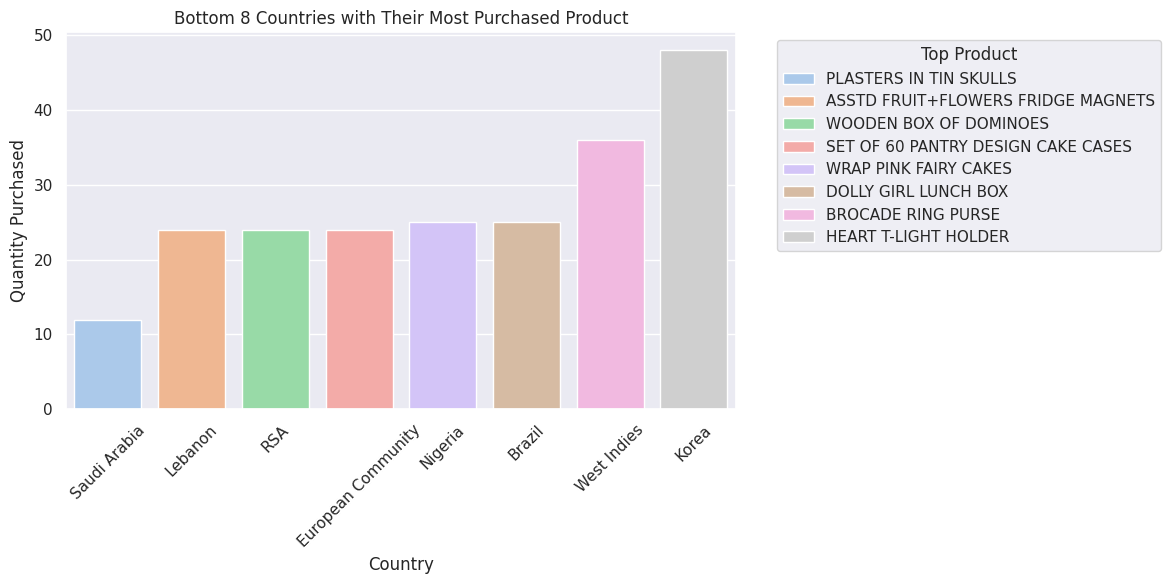

In [29]:
# Group by country and product, summing quantity
country_product_quantity = data.groupby(['country', 'description'])['quantity'].sum().reset_index()

#Get the most purchased product per country
top_product_per_country = country_product_quantity.sort_values('quantity', ascending=False).drop_duplicates('country')

#Select the bottom 8 countries based on quantity of that top product
bottom_8 = top_product_per_country.sort_values(by='quantity', ascending=True).head(8)

plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_8, x='country', y='quantity', hue='description', dodge=False, palette='pastel')

plt.title("Bottom 8 Countries with Their Most Purchased Product")
plt.xlabel("Country")
plt.ylabel("Quantity Purchased")
plt.xticks(rotation=45)
plt.legend(title="Top Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# RFM Estimation - (Recency, Frequency, Monetary)
RFM stands for frequency, recency & monetary is a marketing technique which is used to find the best customers by analyzing their past purchasing behavior. It includes how frequently they have purchased, what is the total amount that they have spend so far, what was the last time they have purchased from our online store so on & so forth

In [30]:
data.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer id,country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [31]:
# Re-read the raw data (assumes 'df' contains both years from Excel)
data = pd.concat([df["Year 2009-2010"], df["Year 2010-2011"]], ignore_index=True)

# Clean column names
data.columns = data.columns.str.lower()

# Remove only cancelled invoices (starting with 'C') — BUT KEEP negative quantities
data = data[~data['invoice'].astype(str).str.startswith('c')]

# Convert dates
data['invoicedate'] = pd.to_datetime(data['invoicedate'])

# Compute total_price (can be negative due to returns)
data['total_price'] = data['quantity'] * data['price']

# Check negative values again
negatives = {
    'quantity': (data['quantity'] < 0).sum(),
    'price': (data['price'] < 0).sum(),
    'total_price': (data['total_price'] < 0).sum()
}
for col, count in negatives.items():
    print(f"Negative values in '{col}': {count}")

Negative values in 'quantity': 22950
Negative values in 'price': 5
Negative values in 'total_price': 19498


In [32]:
#calculating the recency, frequency, T, monetary_value
!pip install lifetimes
import lifetimes
summary = lifetimes.utils.summary_data_from_transaction_data(data, "customer id", "invoicedate", "total_price")
summary = summary.reset_index() #resetting the index
summary.shape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 13.3 MB/s eta 0:00:0000:01


(5942, 5)

A) T - T is the length of the period of observation for the customer based on the value used for freq (the default is frequency is day). This can also be thought of the length of time between a customer’s first purchase and the end of the period, measured in increments defined by freq.

B) Recency - Recency is the point (relative to their own period of observation) at which the customer made their most recent repeat purchase. This can also be thought of the length of time between a customer’s first and last purchase for the period, measured in increments defined by freq.

C) Frequency - Frequency is the number of repeat purchases the customer made during the observation period.

D) Monetary - monetary_value is the average monetary amount of each repeat purchase made by a customer.

In [33]:
summary.head()

,customer id,frequency,recency,T,monetary_value
0,12346.0,10.0,400.0,725.0,-15.468000
1,12347.0,7.0,402.0,404.0,717.398571
2,12348.0,4.0,363.0,438.0,449.310000
3,12349.0,4.0,717.0,735.0,1107.172500
4,12350.0,0.0,0.0,310.0,0.000000


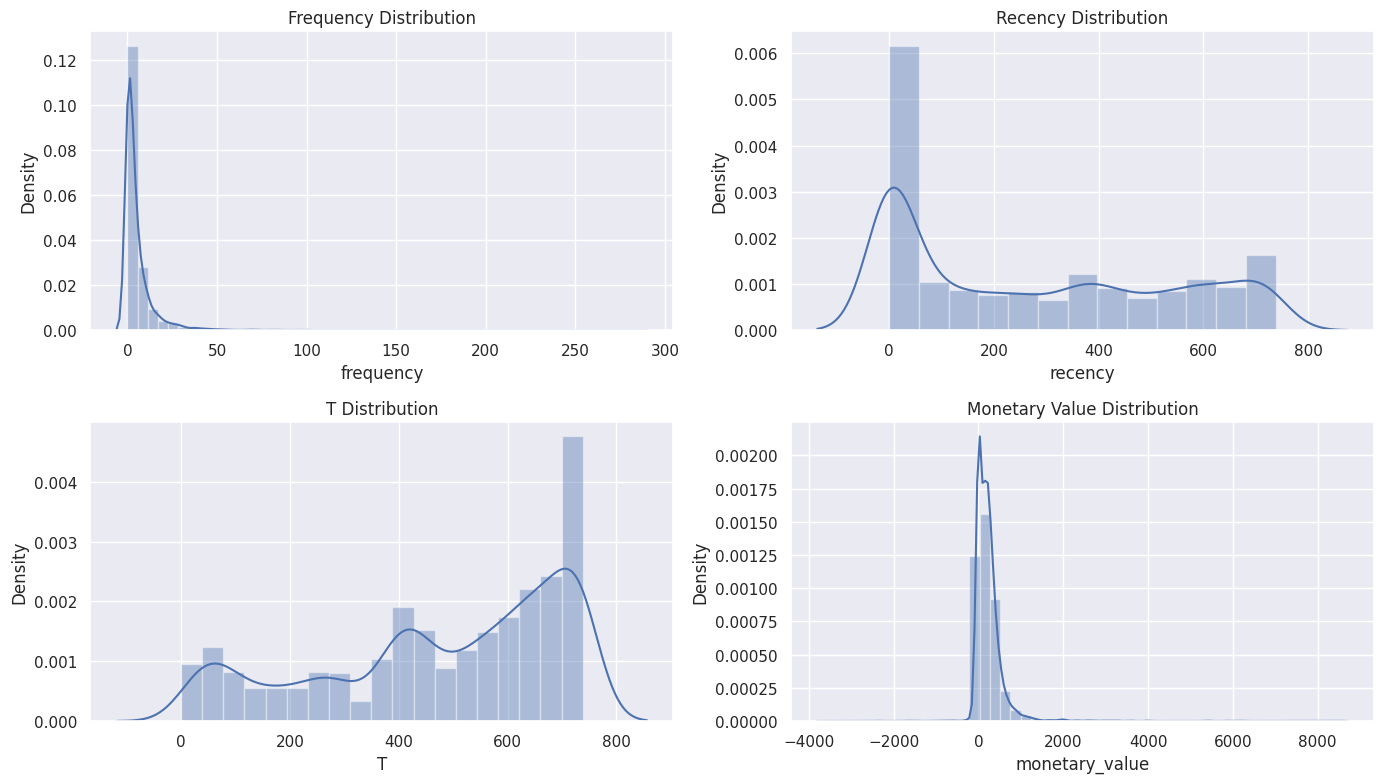

In [34]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

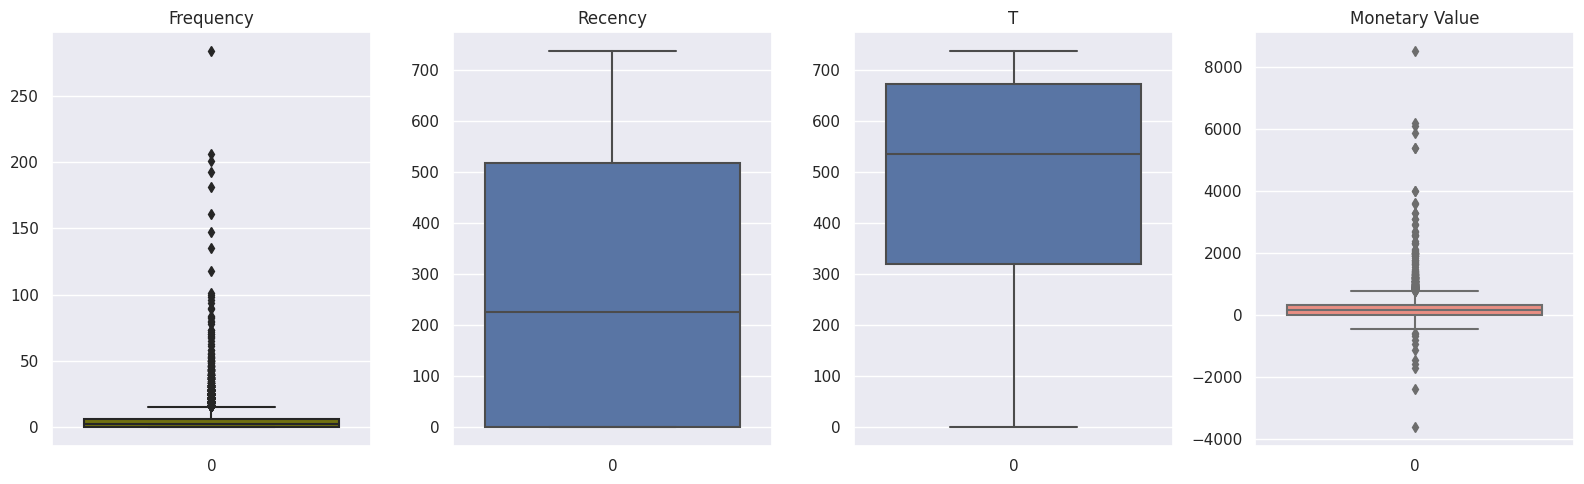

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(summary["monetary_value"], color = "salmon")
plt.title("Monetary Value")
plt.tight_layout()

In [36]:
summary.describe()

,customer id,frequency,recency,T,monetary_value
count,5942.000000,5942.000000,5942.000000,5942.000000,5942.000000
mean,15316.500000,5.479636,275.772299,478.229384,228.814496
std,1715.451981,11.293673,259.830840,223.879537,363.067124
min,12346.000000,0.000000,0.000000,0.000000,-3610.500000
25%,13831.250000,0.000000,0.000000,320.500000,0.000000
50%,15316.500000,2.000000,225.000000,536.000000,174.900625
75%,16801.750000,6.000000,518.000000,674.000000,314.594375
max,18287.000000,284.000000,738.000000,738.000000,8513.271143


In [37]:
#checking for the values containing zero.

print("Total Number of Frequency with 0: %s" % (len(summary[summary["frequency"] == 0])))
print("Total Number of Recency with 0: %s" % (len(summary[summary["recency"] == 0])))
print("Total Number of Monetary Value with 0: %s" % (len(summary[summary["monetary_value"] == 0])))

Total Number of Frequency with 0: 1544
Total Number of Recency with 0: 1544
Total Number of Monetary Value with 0: 1547


In [48]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import xlrd
import pandas as pd
import datetime
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

 **Beta Geo - Negative Binomial Distribution + Gamma Gamma Distribution Model**

In [49]:
summary_bgf = summary.copy()
summary_bgf.head(2)

,customer id,frequency,recency,T,monetary_value
0,12346.0000,10.0000,400.0000,725.0000,-15.4680
1,12347.0000,7.0000,402.0000,404.0000,717.3986


In [51]:
bgf = BetaGeoFitter(penalizer_coef = 0.0)

# We can use penalizer of 0.001 or 0.1 which we will be going to use later on based on the model performance and model selection
bgf.fit(summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>

In [52]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.6682,0.0155,0.6379,0.6985
alpha,49.9435,1.5177,46.9687,52.9182
a,0.1455,0.0145,0.1171,0.1739
b,2.1127,0.3138,1.4977,2.7277


<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>


<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

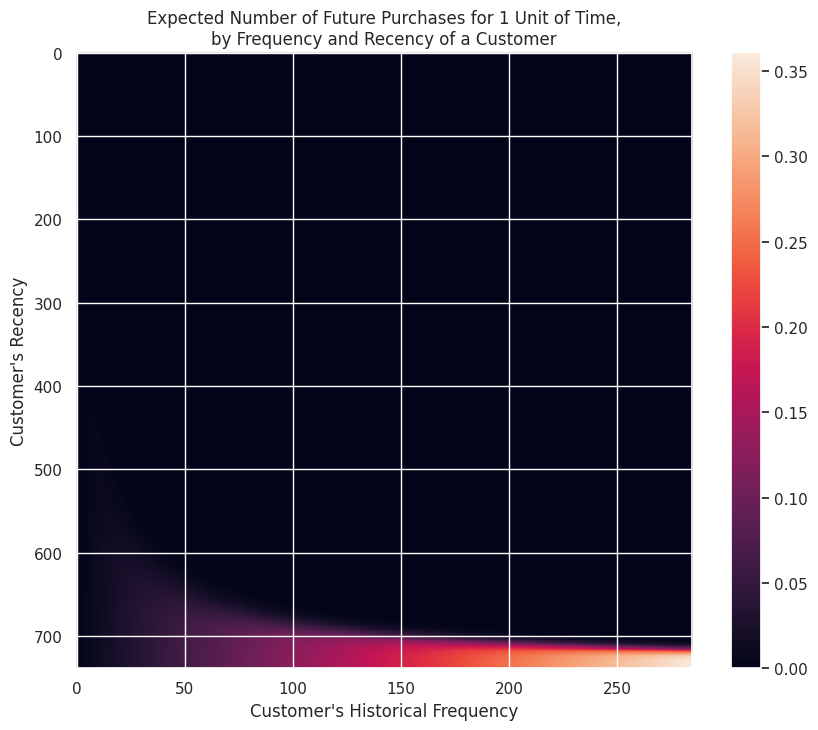

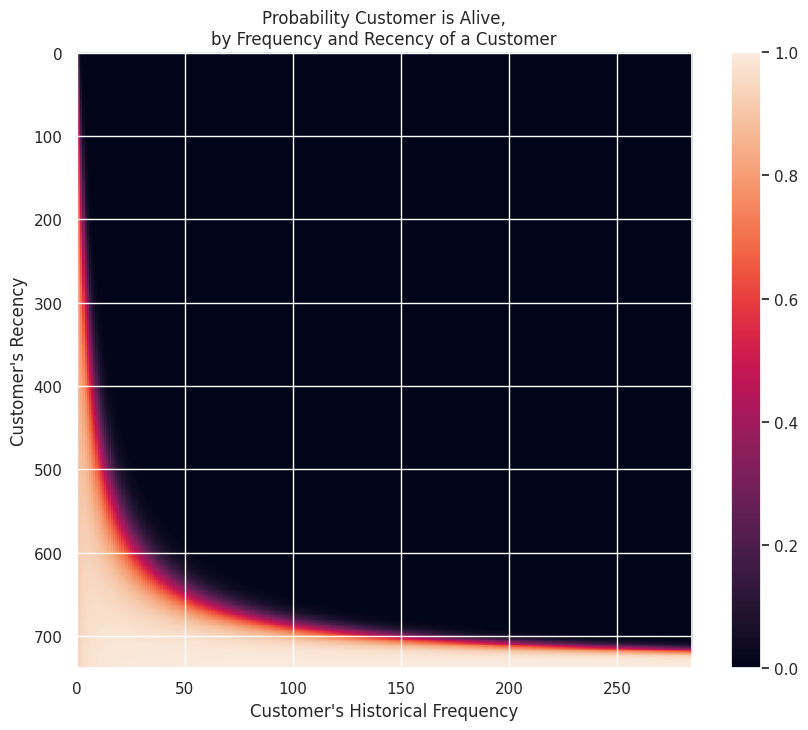

In [53]:
print(bgf)

#plotting the frequency and recency matrix
plt.figure(figsize=(10,8))
plot_frequency_recency_matrix(bgf)

#plotting the churn matrix
plt.figure(figsize=(10,8))
plot_probability_alive_matrix(bgf)

As you can see our 80% customers have already churn or we can say dropped.

In [54]:
t = 30
summary_bgf["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])
summary_bgf.sort_values(by = "predicted_purchases").tail(5)

,customer id,frequency,recency,T,monetary_value,predicted_purchases
2260,14606.0000,181.0000,735.0000,736.0000,165.0794,6.9085
5495,17841.0000,193.0000,736.0000,737.0000,357.4375,7.3559
2965,15311.0000,201.0000,738.0000,738.0000,560.6470,7.6519
402,12748.0000,206.0000,735.0000,735.0000,241.5011,7.8716
2565,14911.0000,284.0000,737.0000,738.0000,948.9961,10.8010


Based on the above analysis, above are the top customers who are likely to purchase in the next day.

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

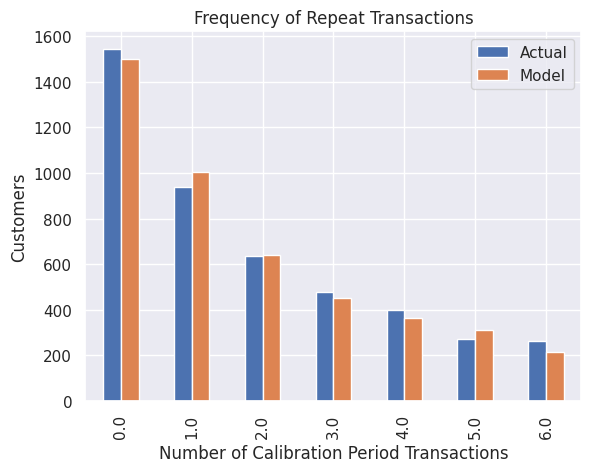

In [55]:
plot_period_transactions(bgf)

We can see that our model is doing fair job. Our model is predicting fairly good at the 0 & 2 calibration time period.

In [57]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(data, "customer id", "invoicedate", 
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')
pd.DataFrame(summary_cal_holdout.head())

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
customer id,,,,,
12346.0000,10.0000,400.0000,541.0000,0.0000,184.0000
12347.0000,3.0000,158.0000,220.0000,4.0000,184.0000
12348.0000,3.0000,190.0000,254.0000,1.0000,184.0000
12349.0000,3.0000,328.0000,551.0000,1.0000,184.0000
12350.0000,0.0000,0.0000,126.0000,0.0000,184.0000


In [58]:
bgf.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.BetaGeoFitter: fitted with 5025 subjects, a: 0.22, alpha: 49.70, b: 2.72, r: 0.67>

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

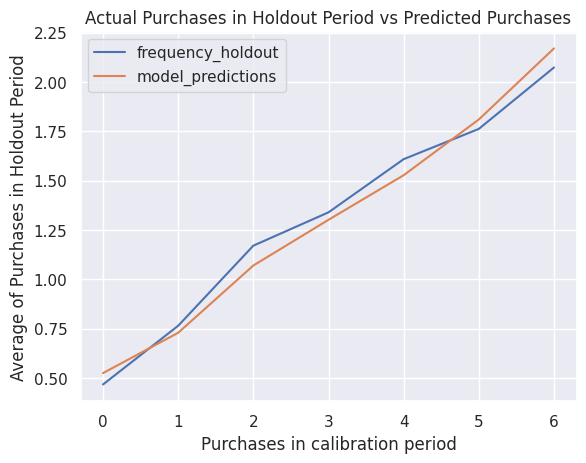

In [60]:
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

As we can see our model does the decent job while predicting the purchase behaviour.

In [61]:
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
customer id,,,,,
12346.0000,10.0000,400.0000,541.0000,0.0000,184.0000
12347.0000,3.0000,158.0000,220.0000,4.0000,184.0000
12348.0000,3.0000,190.0000,254.0000,1.0000,184.0000
12349.0000,3.0000,328.0000,551.0000,1.0000,184.0000
12350.0000,0.0000,0.0000,126.0000,0.0000,184.0000


In [63]:
#Creating a function which can predict the future purchased value based on the lookup window

def bgf_get_pred_error(t, id_):
    
    individual = summary_bgf[summary_bgf["customer id"] == id_]
    
    ind_pred = bgf.predict(t, individual["frequency"], individual["recency"], individual["T"])
    
    actual_val = individual["frequency"]/individual["recency"]*t
    
    error = actual_val - ind_pred
    
    print("Your Predicted Purchase: %s" % (ind_pred))
    print("Your Actual Purchase: %s" % (actual_val))
    print("Prediction Error: %s" % (error))
bgf_get_pred_error(15, 12348.0)

Your Predicted Purchase: 2   0.1322
dtype: float64
Your Actual Purchase: 2   0.1653
dtype: float64
Prediction Error: 2   0.0331
dtype: float64


In [67]:
id_1 = 14606.0
id_2 = 12347.0

In [68]:
days_since_birth = 365

In [70]:
sp_trans_1 = data[data["customer id"] == id_1]
sp_trans_2 = data[data["customer id"] == id_2]

In [73]:
summary_bgf["actual_30"] = summary_bgf["frequency"]/summary_bgf["recency"]*30
summary_bgf.head()

,customer id,frequency,recency,T,monetary_value,predicted_purchases,actual_30
0,12346.0000,10.0000,400.0000,725.0000,-15.4680,0.0774,0.7500
1,12347.0000,7.0000,402.0000,404.0000,717.3986,0.4954,0.5224
2,12348.0000,4.0000,363.0000,438.0000,449.3100,0.2692,0.3306
3,12349.0000,4.0000,717.0000,735.0000,1107.1725,0.1725,0.1674
4,12350.0000,0.0000,0.0000,310.0000,0.0000,0.0554,NaN


summary_bgf = summary_bgf.fillna(value = 0) #filling null values with 0
#calculating the prediction error for the 30 days purchase prediction
summary_bgf["Error"] = summary_bgf["actual_30"] - summary_bgf["predicted_purchases"]
mse = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_bgf["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Purchase Prediction
bgf_mse_purchase_30 = mean_squared_error(summary_bgf["actual_30"], summary_bgf["predicted_purchases"])
bgf_rmse_purchase_30 = sqrt(bgf_mse_purchase_30)  
bgf_avg_error_purchase_30 = summary_bgf["Error"].mean()

Note: This error is based on the 30 days lookup window, it may vary as you adjust the lookup window time.

In [77]:
summary_bgf.head()

,customer id,frequency,recency,T,monetary_value,predicted_purchases,actual_30,Error
0,12346.0000,10.0000,400.0000,725.0000,-15.4680,0.0774,0.7500,0.6726
1,12347.0000,7.0000,402.0000,404.0000,717.3986,0.4954,0.5224,0.0270
2,12348.0000,4.0000,363.0000,438.0000,449.3100,0.2692,0.3306,0.0614
3,12349.0000,4.0000,717.0000,735.0000,1107.1725,0.1725,0.1674,-0.0051
4,12350.0000,0.0000,0.0000,310.0000,0.0000,0.0554,0.0000,-0.0554


<Axes: >

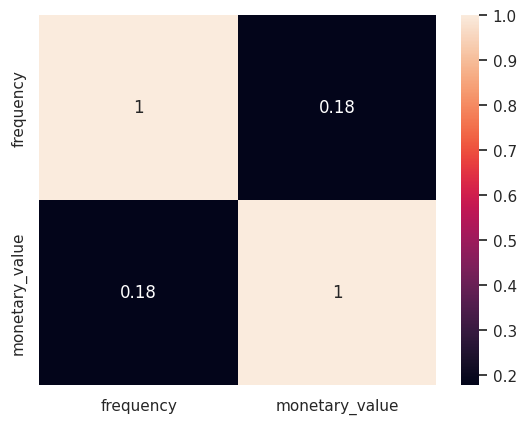

In [78]:
#Filtering the data where we have the values of 0 or less than 0.
res_summary = summary_bgf[summary_bgf["frequency"] > 0]
final_summary = res_summary[res_summary["monetary_value"] > 0]
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

To proceed with the Gamma Gamma Model we have to check for the assumption whether the frequency and monetary values are intercorrelated or not. As we can see here, the correlation between the frequency and monetary value is pretty low so we can go ahead to build Gamma Gamma Model.

In [79]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.37, q: 3.86, v: 696.90>

In [80]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,1.3747,0.0586,1.2599,1.4895
q,3.8644,0.1345,3.6007,4.1281
v,696.9048,50.7679,597.3998,796.4098


In [81]:
summary_bgf.head(2)

,customer id,frequency,recency,T,monetary_value,predicted_purchases,actual_30,Error
0,12346.0000,10.0000,400.0000,725.0000,-15.4680,0.0774,0.7500,0.6726
1,12347.0000,7.0000,402.0000,404.0000,717.3986,0.4954,0.5224,0.0270


In [82]:
summary_ = summary_bgf[(summary_bgf["monetary_value"] > 0) & (summary_bgf["frequency"] > 0)]
summary_.shape

(4185, 8)

In [83]:
summary_["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_["frequency"], 
                                                                        summary_["monetary_value"])
summary_.head()
print("Expected Average Sales: %s" % summary_["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_["monetary_value"].mean())
print("Difference: %s" % (summary_["monetary_value"].mean() - summary_["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"])))

Expected Average Sales: 340.18897558292633
Actual Average Sales: 330.66084951982504
Difference: -9.528126063101297
Mean Squared Error: 20896.881880788293
Root Mean Squared Error: 144.55753830495416


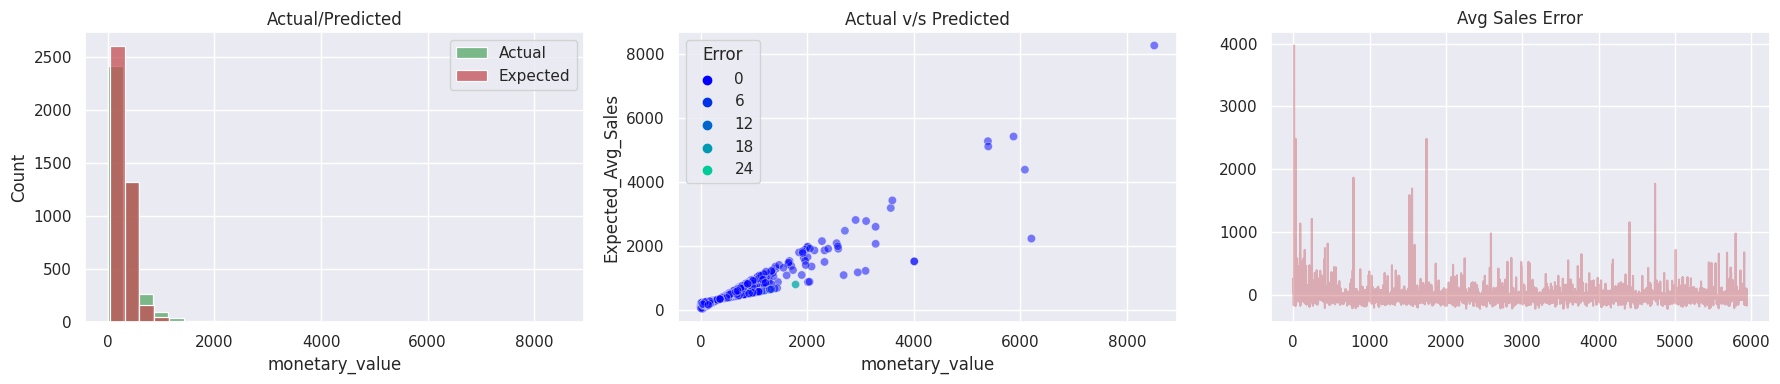

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 4))

# 🔹 Plot 1: Distribution comparison
plt.subplot(131)
sns.histplot(summary_["monetary_value"], color="g", kde=False, bins=30)
sns.histplot(summary_["Expected_Avg_Sales"], color="r", kde=False, bins=30)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])

# 🔹 Plot 2: Scatter plot with hue
plt.subplot(132)
sns.scatterplot(x=summary_["monetary_value"], y=summary_["Expected_Avg_Sales"],
                alpha=0.5, hue=summary_["Error"], palette="winter")
plt.title("Actual v/s Predicted")

# 🔹 Plot 3: Error trend line
plt.subplot(133)
error = summary_["monetary_value"] - summary_["Expected_Avg_Sales"]
plt.plot(error, color='r', alpha=0.4)
plt.title("Avg Sales Error")

plt.tight_layout()
plt.show()

In [86]:
summary_["predicted_clv"] = ggf.customer_lifetime_value(bgf,
                                                       summary_["frequency"],
                                                       summary_["recency"],
                                                       summary_["T"],
                                                       summary_["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)
summary_.head()

,customer id,frequency,recency,T,monetary_value,predicted_purchases,actual_30,Error,Expected_Avg_Sales,predicted_clv
1,12347.0000,7.0000,402.0000,404.0000,717.3986,0.4954,0.5224,0.0270,629.5563,7110.1664
2,12348.0000,4.0000,363.0000,438.0000,449.3100,0.2692,0.3306,0.0614,409.9723,2512.0817
3,12349.0000,4.0000,717.0000,735.0000,1107.1725,0.1725,0.1674,-0.0051,842.5140,3449.7988
6,12352.0000,8.0000,356.0000,392.0000,218.1825,0.5668,0.6742,0.1073,242.2094,3100.0101
7,12353.0000,1.0000,204.0000,408.0000,89.0000,0.0919,0.1471,0.0551,254.8585,536.0351


In [88]:
#manual calculation of CLV
#summary_["predicted_purchases"] * summary_["Expected_Avg_Sales"]
#adding a 5% of profit margin
summary_["CLV"] = summary_["predicted_clv"]*0.05
summary_[summary_["customer id"] == 13902.0]

,customer id,frequency,recency,T,monetary_value,predicted_purchases,actual_30,Error,Expected_Avg_Sales,predicted_clv,CLV
1556,13902.0000,5.0000,99.0000,731.0000,6085.6920,0.0008,1.5152,1.5144,4393.9473,56.6773,2.8339


In [90]:
actual = summary_["monetary_value"]*summary_["actual_30"]
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]
error = actual - pred
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result["Actual"], result["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 108.19828103163518
Mean Squared Error: 907287.2534809995
Root Mean Squared Error: 952.5162746541391


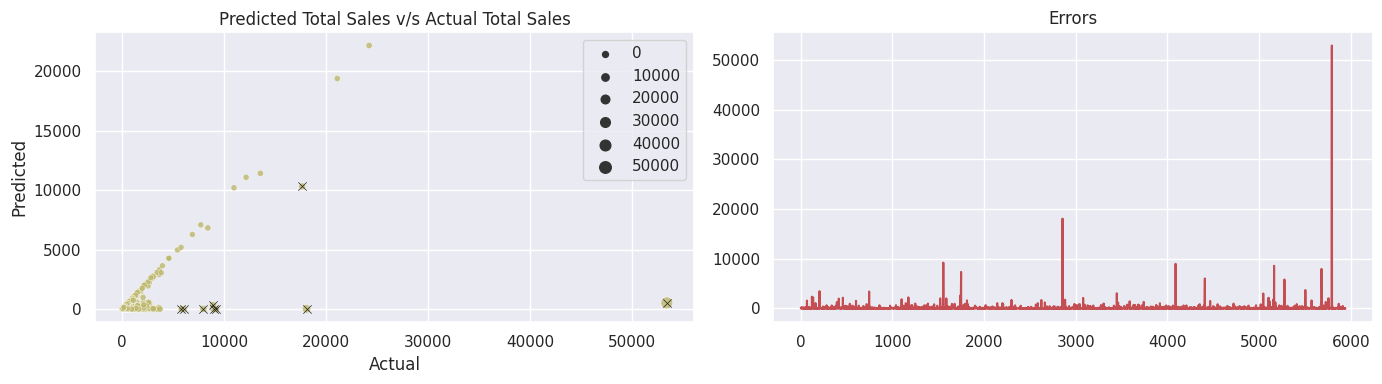

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual Plot
plt.figure(figsize=(14, 4))

# 🔹 Left subplot: Scatter of predictions
plt.subplot(121)
sns.scatterplot(x=result["Actual"], y=result["Predicted"], size=result["Error"],
                color="darkkhaki", alpha=0.8, marker='o')
sns.scatterplot(x=result[result["Error"] > 5000]["Actual"],
                y=result[result["Error"] > 5000]["Predicted"],
                color="k", marker="x")
plt.title("Predicted Total Sales v/s Actual Total Sales")

# 🔹 Right subplot: Error line plot
plt.subplot(122)
plt.plot(result["Error"], color="r")
plt.title("Errors")

plt.tight_layout()
plt.show()
